<a href="https://colab.research.google.com/github/AdrianoKeki/lia1_2024_1/blob/main/Ci%C3%AAncia_de_dados_ANEEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ciência de Dados - Dataset ANEEL (Agência Nacional de Energia Elétrica)** 🧢

Estudo da evolução histórica da Capacidade instalada de geração por UF expressa em kW. Armazena a capacidade Instalada por Estado até o trimestre mais recente, expressos em quantidades e potência instalada em kW (quilowatt). As usinas localizadas em divisas de estados são consideradas no total de capacidade do próprio estado.

**Serão 6 perguntas e 4 desafios! #borafazer**

In [340]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

**Carregando os dados**

In [342]:
# Carrega o dataset
df_ss = pd.read_csv('/content/drive/MyDrive/Aula IA/17-04/capacidade-instalada-geracao-uf.csv', sep=';', encoding='latin1')

In [343]:
# Shape
df_ss.shape

(1480, 6)

In [344]:
# Amostra dos dados
df_ss.head()

,DatGeracaoConjuntoDados,AnoReferencia,MesReferencia,NomUF,SigUF,MdaPotenciaInstaladakW
0,2024-04-01,2006,12,ACRE,AC,"141760,50"
1,2024-04-01,2006,12,ALAGOAS,AL,"7626936,50"
2,2024-04-01,2006,12,AMAZONAS,AM,"2105228,60"
3,2024-04-01,2006,12,AMAPA,AP,"273950,00"
4,2024-04-01,2006,12,BAHIA,BA,"8899100,90"


In [345]:
#Transformar o operador decimal de , para . para que o programa reconheça os dado como numeral float

df_ss['MdaPotenciaInstaladakW'] = df_ss['MdaPotenciaInstaladakW'].str.replace(',', '.')

df_ss['MdaPotenciaInstaladakW'] = df_ss['MdaPotenciaInstaladakW'].astype(float)

In [346]:
# Amostra dos dados
df_ss.tail()

,DatGeracaoConjuntoDados,AnoReferencia,MesReferencia,NomUF,SigUF,MdaPotenciaInstaladakW
1475,2024-04-01,2024,2,RIO GRANDE DO SUL,RS,9669569.93
1476,2024-04-01,2024,2,SANTA CATARINA,SC,5026742.42
1477,2024-04-01,2024,2,SERGIPE,SE,4891390.40
1478,2024-04-01,2024,2,SÃO PAULO,SP,24898870.62
1479,2024-04-01,2024,2,TOCANTINS,TO,1968846.40


**Análise exploratória**

In [347]:
# Colunas do conjunto de dados
df_ss.columns

Index(['DatGeracaoConjuntoDados', 'AnoReferencia', 'MesReferencia', 'NomUF',
       'SigUF', 'MdaPotenciaInstaladakW'],
      dtype='object')

In [348]:
# Verificando o tipo de dado de cada coluna
df_ss.dtypes

DatGeracaoConjuntoDados     object
AnoReferencia                int64
MesReferencia                int64
NomUF                       object
SigUF                       object
MdaPotenciaInstaladakW     float64
dtype: object

In [349]:
# Verificando se há registros duplicados
df_ss[df_ss.duplicated()]

,DatGeracaoConjuntoDados,AnoReferencia,MesReferencia,NomUF,SigUF,MdaPotenciaInstaladakW


In [350]:
# Verificando de há valores ausentes
df_ss.isnull().sum()

DatGeracaoConjuntoDados    0
AnoReferencia              0
MesReferencia              0
NomUF                      0
SigUF                      0
MdaPotenciaInstaladakW     0
dtype: int64

## **1. Qual o ano com a maior media de capacidade de geração de energia do estado de Goiás?**

In [351]:
# Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_ss_p1 = df_ss[df_ss['SigUF'] == 'GO']

In [352]:
# Em seguida agrupamos por anos e calculamos a média de capacidade de geração de energia por ano, pois existem anos com duas ou mais informações por estado
df_ss_p1_total = df_ss.groupby(['AnoReferencia'])['MdaPotenciaInstaladakW'].agg([np.mean])

# Renomear a coluna mean para Capacidade
df_ss_p1_total.rename(columns={'mean': 'Capacidade'}, inplace=True)

In [353]:
# Então encontramos o ano com maior capacidade de geração
ano_maior_geracao = df_ss_p1_total.idxmax()
print("Ano com maior capacidade de geração do estado de Goiás:", ano_maior_geracao)

Ano com maior capacidade de geração do estado de Goiás: Capacidade    2024
dtype: int64


In [354]:
# Para conferir o resultado

df_ss_p1_total.sort_values(by='Capacidade', ascending=False)

,Capacidade
AnoReferencia,
2024,7.403993e+06
2023,7.196588e+06
2022,6.867198e+06
2021,6.592620e+06
2020,6.412758e+06
2019,6.171450e+06
2013,5.946909e+06
2018,5.939085e+06
2012,5.702028e+06


## **2. Qual o total de capacidade de geração total de cada estado no período de 2006 a 2024?**
Apresente o resultado em um gráfico de barras.

In [355]:
# Calculamos a média por ano para cada estado, pois alguns anos existem duas ou mais informações de capacidade de geração
df_ss_p2 = df_ss.groupby(['AnoReferencia', 'SigUF'])['MdaPotenciaInstaladakW'].agg([np.mean])

In [356]:
# Agrupar as informações de média por ano para cada estado e somar todos os resultados
df_ss_p2 = df_ss_p2.groupby('SigUF')['mean'].sum()

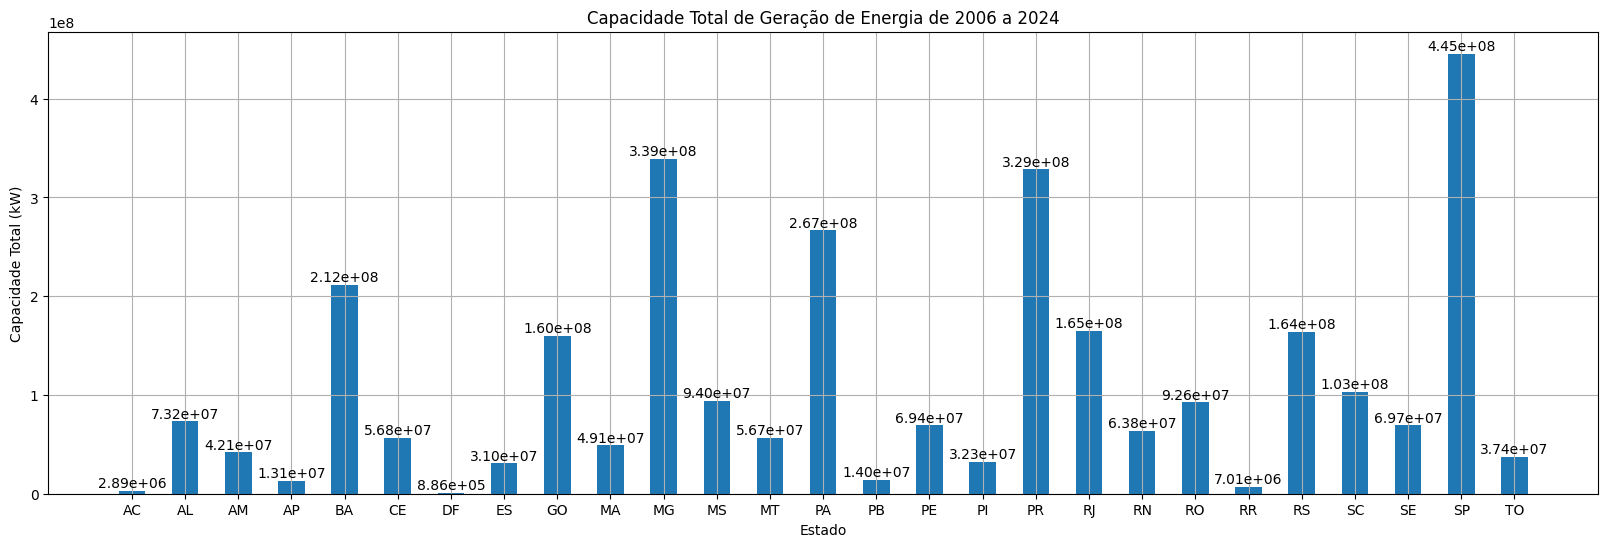

In [357]:
# Plotando o gráfico
plt.figure(figsize=(20, 6))  # Define o tamanho do gráfico
plt.bar(df_ss_p2.index, df_ss_p2, width=0.5)  # Ajuste a largura das barras conforme desejado
plt.title('Capacidade Total de Geração de Energia de 2006 a 2024')
plt.xlabel('Estado')
plt.ylabel('Capacidade Total (kW)')
plt.grid(True)  # Adiciona uma grade ao gráfico

# Adiciona os valores de cada barra dentro do próprio gráfico
for x, y in enumerate(df_ss_p2):
    plt.text(x, y, f'{y:.2e}', ha='center', va='bottom')  # Adiciona o valor de cada barra em notação científica

# Define a notação científica para os valores dentro do gráfico
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.show()


## **3. Qual o total da capacidade de geração por estado no ano de 2024?**

Apresente o resultado em um gráfico de barras.

In [358]:
# Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_ss_p3 = df_ss[df_ss['AnoReferencia'] == 2024]

In [359]:
#Verificar se existem mais de uma informação para esse ano ou seja count > 27
numero_de_linhas = df_ss_p3.shape[0]
print(numero_de_linhas)

27


In [360]:
df_ss_p3 = df_ss.groupby(['SigUF'])['MdaPotenciaInstaladakW'].agg([np.mean])

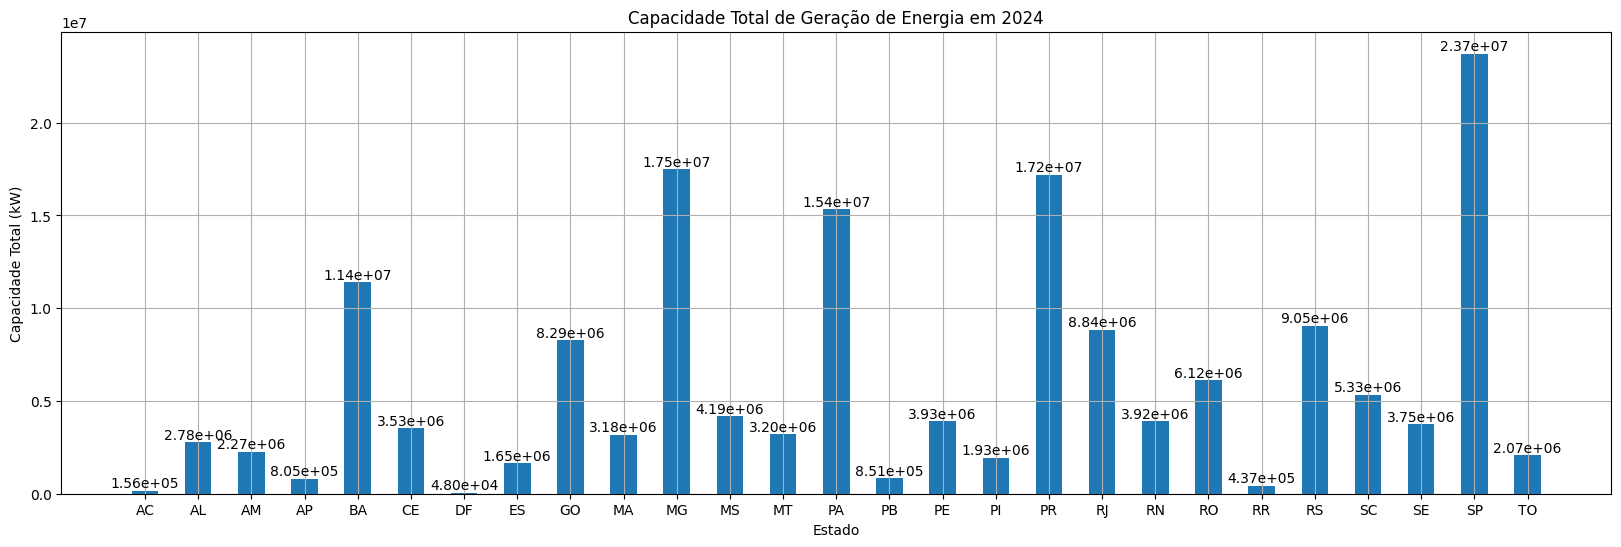

In [361]:
# Plot
plt.figure(figsize=(20, 6))  # Define o tamanho do gráfico
plt.bar(df_ss_p3.index, df_ss_p3.values.flatten(), width=0.5)  # Utilize os índices do DataFrame e ajuste a largura das barras
plt.title('Capacidade Total de Geração de Energia em 2024')
plt.xlabel('Estado')
plt.ylabel('Capacidade Total (kW)')
plt.grid(True)  # Adiciona uma grade ao gráfico

# Adiciona os valores de cada barra dentro do próprio gráfico
for x, y in enumerate(df_ss_p3.values.flatten()):
    plt.text(x, y, f'{y:.2e}', ha='center', va='bottom')  # Adiciona o valor de cada barra em notação científica

# Define a notação científica para os valores dentro do gráfico
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.show()

In [362]:
print(type(df_ss_p3.index))
print(type(df_ss_p3.values))

<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


## **4. Quais são as 4 estados com maior capacidade em geração de energia em 2024?**

Apresente o resultado em um gráfico de barras.

In [363]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros

df_ss_p4 = df_ss_p3.sort_values(by='mean', ascending=False).head(4)


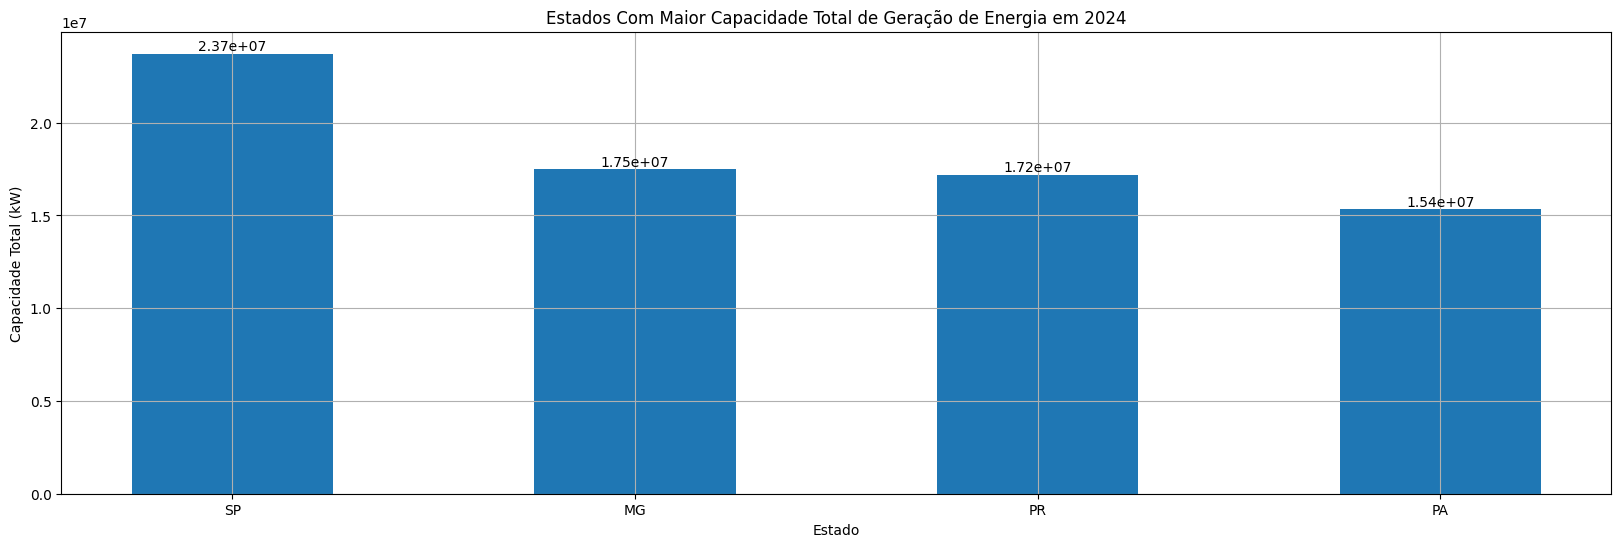

In [364]:
# Plot
plt.figure(figsize=(20, 6))  # Define o tamanho do gráfico
plt.bar(df_ss_p4.index, df_ss_p4.values.flatten(), width=0.5)  # Utilize os índices do DataFrame e ajuste a largura das barras
plt.title('Estados Com Maior Capacidade Total de Geração de Energia em 2024')
plt.xlabel('Estado')
plt.ylabel('Capacidade Total (kW)')
plt.grid(True)  # Adiciona uma grade ao gráfico

# Adiciona os valores de cada barra dentro do próprio gráfico
for x, y in enumerate(df_ss_p4.values.flatten()):
    plt.text(x, y, f'{y:.2e}', ha='center', va='bottom')  # Adiciona o valor de cada barra em notação científica

# Define a notação científica para os valores dentro do gráfico
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.show()

## **5. Qual ano teve a maior capacidade de geração?**

Apresente o resultado em um gráfico de pizza.

In [365]:
# Agrupamos por segmento e calculamos o total de vendas
df_ss_p5 = df_ss.groupby('AnoReferencia')['MdaPotenciaInstaladakW'].mean().reset_index().sort_values(by = 'MdaPotenciaInstaladakW',
                                                                                      ascending = False)

In [366]:
df_ss_p5.head(27)

,AnoReferencia,MdaPotenciaInstaladakW
18,2024,7.403993e+06
17,2023,7.196588e+06
16,2022,6.867198e+06
15,2021,6.592620e+06
14,2020,6.412758e+06
13,2019,6.171450e+06
7,2013,5.946909e+06
12,2018,5.939085e+06
6,2012,5.702028e+06
11,2017,5.701022e+06


In [367]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1e}'.format(val)
    return my_format


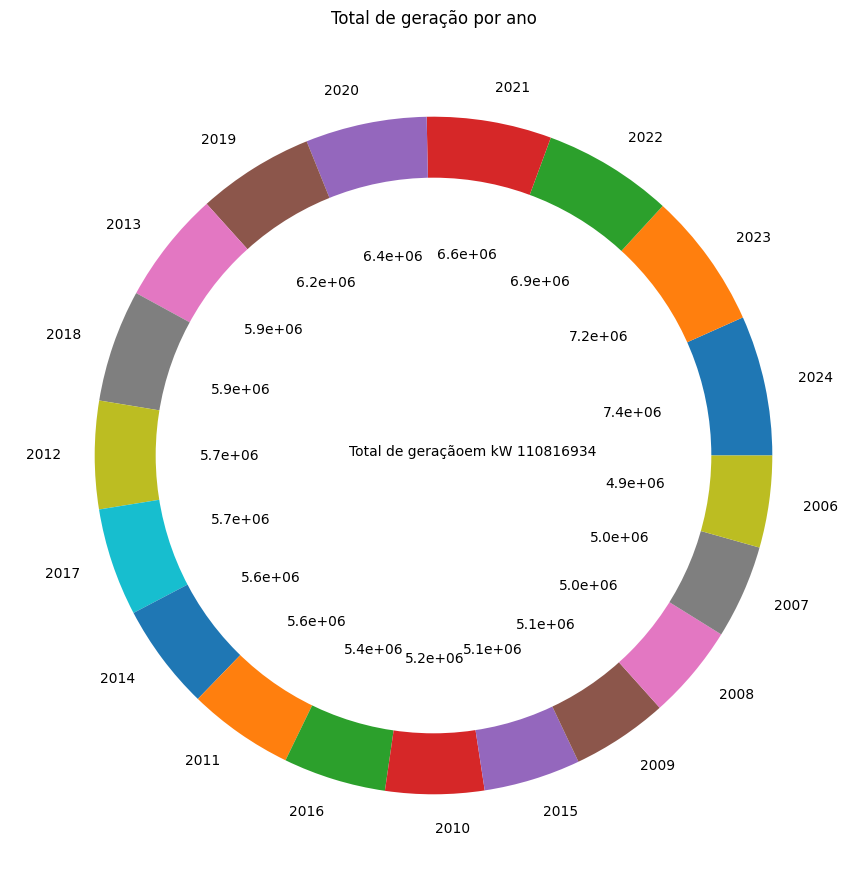

In [368]:
# Plot

# Tamanho da figura
plt.figure(figsize=(11, 11))

# Gráfico de pizza
plt.pie(df_ss_p5['MdaPotenciaInstaladakW'],
        labels=df_ss_p5['AnoReferencia'],
        autopct=autopct_format(df_ss_p5['MdaPotenciaInstaladakW']),
        startangle=0)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text='Total de geração' + 'em kW ' + str(int(sum(df_ss_p5['MdaPotenciaInstaladakW']))), xy=(-0.25, 0))
plt.title('Total de geração por ano')
plt.show()

## **Desafio 1 - Nível Júnior**

Supondo que toda a capacidade gerada fora consumida, com um valor de R$ 0,656 por kWh, temos:

- 20% da população paga antes do vencimento e tem 10% de desconto
- 40% da população paga no dia do vencimento com o valor integral
- 40% da população paga depois do vencimento e tem 10% de juros

Qual o valor total arrecadado desde 2006?

In [369]:
# Calculo da arrecadação
# Calculo da energia gerada por hora durante o período de 2006 a 2024
totalkw = sum(df_ss_p5['MdaPotenciaInstaladakW'])*24*365
pag_desc = totalkw*0.20*0.9*0.656
pag_dia = totalkw*0.4*0.656
pag_atras = totalkw*0.4*1.1*0.656
totalpag = pag_desc + pag_dia + pag_atras
totalpagnormal = totalkw * 0.656

In [370]:
print('O valor com os descontos e juros será R${:.2f}'.format(totalpag))
print('E o valor sem nenhum tipo de acréscimos ou descontos seria de R${:.2f}'.format(totalpagnormal))

O valor com os descontos e juros será R$649552487425.36
E o valor sem nenhum tipo de acréscimos ou descontos seria de R$636816164142.51


**Se vendido toda a capacidade gerada neste período, teria-se arrecadado aproximadamente 637 bilhões se adotado o mesmo valor para cada ano.**



## **Desafio 2 - Nível Master**

Considerando a inflação de 2006 a 2024 de 235,778760 % (dado real) qual seria o valor arrecadado no ano de 2024 se fosse consumida a capacidade gerada em 2006?

In [371]:
# Valor de 2006 inflacionado até 2024
cons_2006 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2006, 'MdaPotenciaInstaladakW'].values[0]
cons_2006_inf = cons_2006 * 3.35778760 * 24 * 365 * 0.656

print('O valor do consumo inflacionado de 2006 a 2024 é de R${:.2f}'.format(cons_2006_inf))

O valor do consumo inflacionado de 2006 a 2024 é de R$93682991829.26


## **Desafio 3 - Nível Master Ninja**

Qual o valor total arrecadado no período de 2006 a 2024 atualizado considerando as seguintes inflações*:

2006 - 2024 = 235,778760 %

2007 - 2024 = 223,387920 %

2008 - 2024 = 200,115790 %

2009 - 2024 = 173,310820 %

2010 - 2024 = 178,091910 %

2011 - 2024 = 149,806020 %

2012 - 2024 = 137,691340 %

2013 - 2024 = 120,455580 %

2014 - 2024 = 108,941620 %

2015 - 2024 = 101,514300 %

2016 - 2024 = 82,301260 %

2017 - 2024 = 70,100140 %

2018 - 2024 = 70,990900 %

2019 - 2024 = 59,006760 %

2020 - 2024 = 48,183540 %

2021 - 2024 = 20,339060 %

2022 - 2024 = 2,169960 %

2023 - 2024 = -3,111700 %

*dados retirados do site do BACEN

In [372]:
# Valor de 2006 inflacionado até 2024
#cons_2006_inf

# Valor de 2007 inflacionado até 2024
cons_2007 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2007, 'MdaPotenciaInstaladakW'].values[0]
cons_2007_inf = cons_2007 * 3.2338792 * 24 * 365 * 0.656

# Valor de 2008 inflacionado até 2024
cons_2008 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2008, 'MdaPotenciaInstaladakW'].values[0]
cons_2008_inf = cons_2008 * 3.0011579 * 24 * 365 * 0.656

# Valor de 2009 inflacionado até 2024
cons_2009 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2009, 'MdaPotenciaInstaladakW'].values[0]
cons_2009_inf = cons_2009 * 2.7331082 * 24 * 365 * 0.656

# Valor de 2010 inflacionado até 2024
cons_2010 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2010, 'MdaPotenciaInstaladakW'].values[0]
cons_2010_inf = cons_2010 * 2.78091910 * 24 * 365 * 0.656

# Valor de 2011 inflacionado até 2024
cons_2011 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2011, 'MdaPotenciaInstaladakW'].values[0]
cons_2011_inf = cons_2011 * 2.49806020 * 24 * 365 * 0.656

# Valor de 2012 inflacionado até 2024
cons_2012 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2012, 'MdaPotenciaInstaladakW'].values[0]
cons_2012_inf = cons_2012 * 2.37691340 * 24 * 365 * 0.656

# Valor de 2013 inflacionado até 2024
cons_2013 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2013, 'MdaPotenciaInstaladakW'].values[0]
cons_2013_inf = cons_2013 * 2.2045558 * 24 * 365 * 0.656

# Valor de 2014 inflacionado até 2024
cons_2014 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2014, 'MdaPotenciaInstaladakW'].values[0]
cons_2014_inf = cons_2014 * 2.08941620 * 24 * 365 * 0.656

# Valor de 2015 inflacionado até 2024
cons_2015 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2015, 'MdaPotenciaInstaladakW'].values[0]
cons_2015_inf = cons_2015 * 2.01514300 * 24 * 365 * 0.656

# Valor de 2016 inflacionado até 2024
cons_2016 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2016, 'MdaPotenciaInstaladakW'].values[0]
cons_2016_inf = cons_2016 * 1.82301260 * 24 * 365 * 0.656

# Valor de 2017 inflacionado até 2024
cons_2017 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2017, 'MdaPotenciaInstaladakW'].values[0]
cons_2017_inf = cons_2017 * 1.70100140 * 24 * 365 * 0.656

# Valor de 2018 inflacionado até 2024
cons_2018 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2018, 'MdaPotenciaInstaladakW'].values[0]
cons_2018_inf = cons_2018 * 1.70990900 * 24 * 365 * 0.656

# Valor de 2019 inflacionado até 2024
cons_2019 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2019, 'MdaPotenciaInstaladakW'].values[0]
cons_2019_inf = cons_2019 * 1.59006760 * 24 * 365 * 0.656

# Valor de 2020 inflacionado até 2024
cons_2020 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2020, 'MdaPotenciaInstaladakW'].values[0]
cons_2020_inf = cons_2020 * 1.48183540 * 24 * 365 * 0.656

# Valor de 2021 inflacionado até 2024
cons_2021 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2021, 'MdaPotenciaInstaladakW'].values[0]
cons_2021_inf = cons_2021 * 1.20339060 * 24 * 365 * 0.656

# Valor de 2022 inflacionado até 2024
cons_2022 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2022, 'MdaPotenciaInstaladakW'].values[0]
cons_2022_inf = cons_2022 * 1.02169960 * 24 * 365 * 0.656

# Valor de 2023 inflacionado até 2024
cons_2023 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2023, 'MdaPotenciaInstaladakW'].values[0]
cons_2023_inf = cons_2023 * (1-0.3111700) * 24 * 365 * 0.656

# Valor de 2024
cons_2024 = df_ss_p5.loc[df_ss_p5['AnoReferencia'] == 2024, 'MdaPotenciaInstaladakW'].values[0]
cons_2024_inf = cons_2024 * 24 * 365 * 0.656

#Valor Total Inflacionado

valor_tot_inf = cons_2024_inf + cons_2023_inf + cons_2022_inf + cons_2021_inf + cons_2020_inf + cons_2019_inf + cons_2018_inf + cons_2017_inf + cons_2016_inf + cons_2015_inf + cons_2014_inf + cons_2013_inf + cons_2012_inf + cons_2011_inf + cons_2010_inf + cons_2009_inf + cons_2008_inf + cons_2007_inf + cons_2008_inf


print('O valor do consumo inflacionado de 2006 a 2024 é de R${:.2f}'.format(valor_tot_inf))



O valor do consumo inflacionado de 2006 a 2024 é de R$1227106833617.78


## **Desafio 4 - Nível Master Ninja das Galáxias**

Qual a diferença do valor estimado com o valor fixo de R$0,656 para o corrigido pela inflação?

In [373]:
aumentoinf = totalpagnormal/valor_tot_inf

print('O aumento valor do consumo pago para o consumo inflacionado de 2006 a 2024 é de {:.2f}%'.format(aumentoinf*100))

O aumento valor do consumo pago para o consumo inflacionado de 2006 a 2024 é de 51.90%
